In [49]:
import sys


PACKAGE_PARENT = '../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.evaluate.eval_agents import EvaluateGameSA
from alphaslime.agents.other.semiGradSarsa import SemiGradSarsa
from alphaslime.approx.linearq import LinearQApprox

from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym
import csv

import time

In [53]:
# config intial properties

env_id = 'CartPole-v0'
env = gym.make(env_id)
# seed the random numbers and the gym environment
# seed = 42
seed = int(time.time()) #1630937434
np.random.seed(seed)    
env.seed(seed)

# agent properties
# from sources
'''
https://www.martinholub.com/eth/code/2018/07/14/ReinforcementLearning.html

https://ikvibhav.medium.com/open-aigym-simple-sarsa-and-q-learning-reinforcement-learning-implementations-7d5ea6f1ff9
'''
epsilon = 0.2
gamma  = 0.995
alpha = 0.15

training_episodes = 100
observation_dimension=4
action_table = [0, 1]


# q function approximator
q_hat = LinearQApprox()
env = gym.make('CartPole-v0')
# set config file for agent
config = {
    'alpha': alpha,
    'gamma': gamma,
    'epsilon': epsilon,
    'action_table': action_table,
    'd': observation_dimension,
    't_max': 200,
    'max_score': 200,
    'episode_printer': 100,
    'env': env,
    'weights':None,
    'q_hat': q_hat
}



In [51]:
# init the agent
agent = SemiGradSarsa(config)
# agent.EPSILON_DECAY_STATE = False

num_episodes = training_episodes
# train the agent
trained_agent = agent.train(num_episodes)

# get training data
training_data = np.array(trained_agent.train_data)

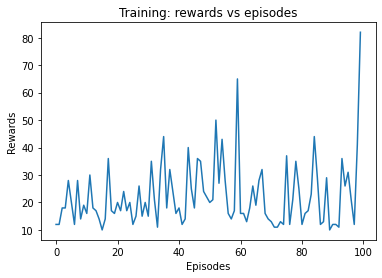

In [52]:
# plot training data
n, d = training_data.shape

episodes = np.arange(n)
# plot the training rewards 
plt.plot(episodes, training_data[:,0])
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Training: rewards vs episodes')
plt.show()
